# Declaration of Originality

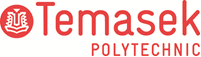

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : XAVIER WONG SHU CAN (2404733D)
* Tutorial Group                : P04
* Tutor						    : EMILE SABASTIAN
* Submission Date               : 11/2/2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [1]:
## Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from scipy import stats
from scipy.stats import randint

# 1. Business Understanding
Goal: ?

# 2. Data Understanding

## 2.1 Load dataset

In [2]:
## Read *.csv file into pandas DataFrame
FILE_PATH = "dataset.csv"
df = pd.read_csv(FILE_PATH)
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


## 2.2 Summary Statistics

In [3]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

<span style="color:#42cef5;">
The dataset contains 4,424 records and 35 columns, with no missing values across all features. 
<br><br />
Most variables are stored as int64 types, which represent categorical features encoded numerically, such as marital status, application mode, and gender. 
There are 5 continuous variables stored as float64, such as GDP and academic-related metrics.

The target variable 'Target' is of type object, indicating a categorical outcome that will need to be encoded before model training.
<span>

In [4]:
## Check for missing data
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

<span style="color:#42cef5;">
The missing value check shows 0 missing values across all columns.
<br><br/>
Confirms that the dataset is complete and no imputation or removal of records is required before modeling.
</span>


In [14]:
## Describe data distribution
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


<span style="color:#42cef5;">
Many variables show discrete distributions, indicating that several features are categorical variables encoded as integers rather than true continuous measures.
<br></br>
Academic performance variables like curricular units enrolled, evaluated, approved, and grades show moderate spread, suggesting meaningful variation in student engagement and outcomes across semesters. The presence of zero values in some academic fields like 'without evaluations' indicates cases where students did not undergo assessment.

Economic variables like unemployment rate, inflation rate, and GDP have broader ranges and non-zero variance, which may introduce external contextual effects into the model and could require scaling depending on the algorithm used.
</span>

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

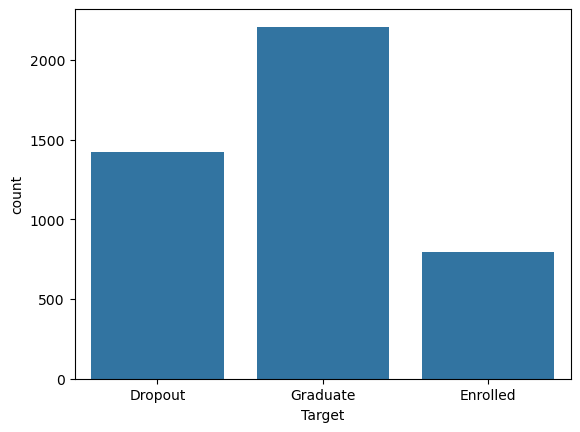

In [6]:
## Understanding distribution of target
sns.countplot(x="Target", data=df)
df["Target"].value_counts()

<span style="color:#42cef5;">
The target variable consists of three classes: Graduate, Dropout, and Enrolled.
<br></br>
The distribution is imbalanced, with Graduate being the majority class (2,209), followed by Dropout (1,421), and Enrolled as the minority class (794).

This class imbalance indicates that the model may become biased toward predicting graduates, which should be considered during model evaluation. Apart from accuracy, using F1-score or recall may be better for this dataset, especially if identifying dropout studenets is a key objective.
</span>

### 2.3.1.2 Understanding distribution of features

<Axes: xlabel='Age at enrollment', ylabel='Count'>

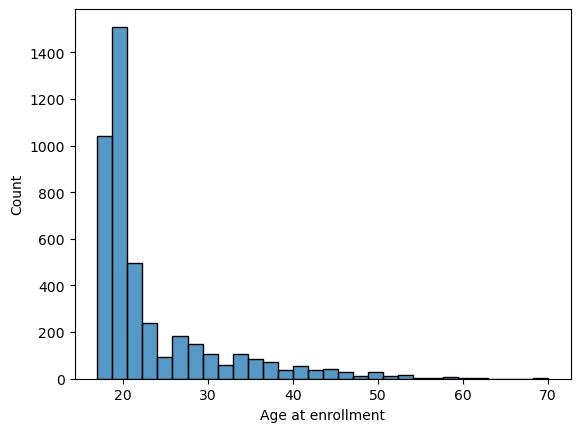

In [7]:
## Understanding distribution of features
sns.histplot(df["Age at enrollment"], bins=30)

<span style="color:#42cef5;">
The age distribution is right-skewed, with most students enrolling between 18–22 years old and a small number of mature students forming a long tail.
<br><br/>
A small number of older students form outliers relative to the main age distribution, but these values appear valid and should be retained.
</span>

Text(0.5, 0, 'Scholarship Holder')

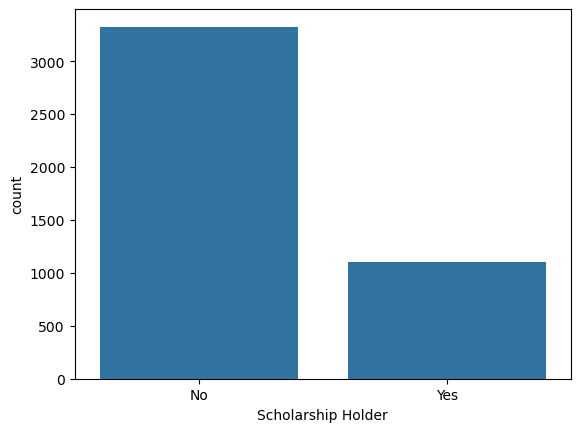

In [16]:
sns.countplot(x=df["Scholarship holder"].map({0: "No", 1: "Yes"}))
plt.xlabel("Scholarship Holder")



<span style="color:#42cef5;">
Most students are not scholarship holders, with scholarship recipients forming a smaller minority.
</span>

<Axes: xlabel='Gender_label', ylabel='count'>

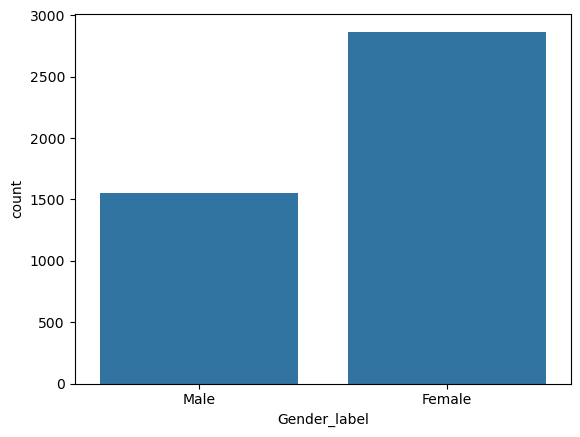

In [15]:
df["Gender_label"] = df["Gender"].map({0: "Female", 1: "Male"})
sns.countplot(x="Gender_label", data=df)

<span style="color:#42cef5;">
The dataset contains more female students than male students.
</span>

### 2.3.2 Understanding relationship between variables

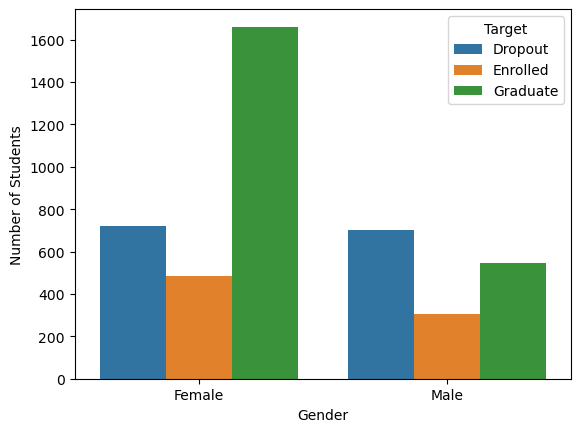

In [10]:
## Understanding relationship between variables
sns.countplot(x='Gender', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'], data=df)
plt.xticks(ticks=[0,1], labels=['Female','Male'])
plt.ylabel('Number of Students')
plt.show()

<span style="color:#42cef5;">
Female students make up a larger proportion of the dataset and therefore have higher counts across all outcome categories. Among females, the graduate outcome is the most common, followed by dropout and enrolled.
<br></br>
Male students show a higher relative proportion of dropouts compared to graduates when contrasted with females, suggesting that gender may have an association with student outcomes. However, since females are more represented overall, conclusions should be drawn by considering proportions rather than absolute counts.
</span>

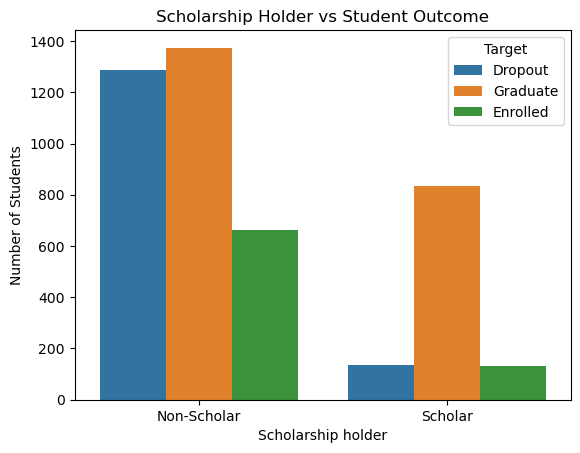

In [11]:
## Understanding relationship between variables
sns.countplot(x="Scholarship holder", hue="Target", data=df)
plt.title("Scholarship Holder vs Student Outcome")
plt.xticks(ticks=[0,1], labels=['Non-Scholar','Scholar'])
plt.ylabel('Number of Students')
plt.show()

<span style="color:#42cef5;">
Non-scholarship students form the majority of the dataset and therefore account for most outcomes across all categories. Among non-scholars, dropout and graduate counts are relatively close, indicating mixed academic outcomes.
<br></br>
In contrast, scholarship holders show a much higher number of graduates and significantly fewer dropouts, suggesting a strong association between scholarship status and successful academic completion. This may reflect higher academic ability, financial stability, or increased institutional support among scholarship recipients.
</span>

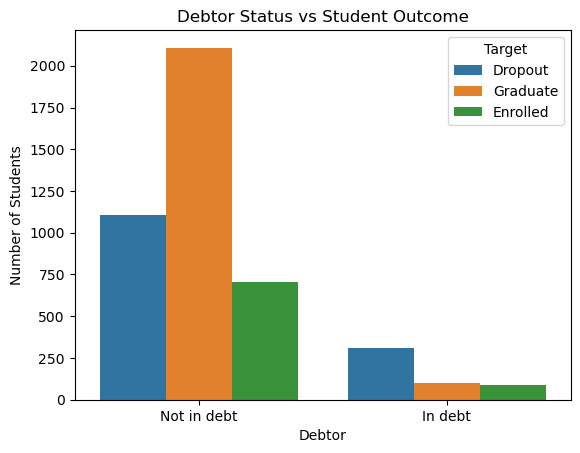

In [12]:
## Understanding relationship between variables
sns.countplot(x="Debtor", hue="Target", data=df)
plt.title("Debtor Status vs Student Outcome")
plt.ylabel('Number of Students')
plt.xticks(ticks=[0,1], labels=['Not in debt','In debt'])
plt.show()

<span style="color:#42cef5;">
Students who are not in debt make up the majority of the dataset and show a much higher number of graduates compared to dropouts. This suggests that financial stability is associated with more favorable academic outcomes.
<br></br>
In contrast, students in debt exhibit a noticeably higher proportion of dropouts and significantly fewer graduates. This indicates that being in debt may be a strong risk factor for academic discontinuation.

Overall, debtor status appears to have a strong association with student outcomes, making it a potentially important predictive feature for identifying at-risk students.
</span>

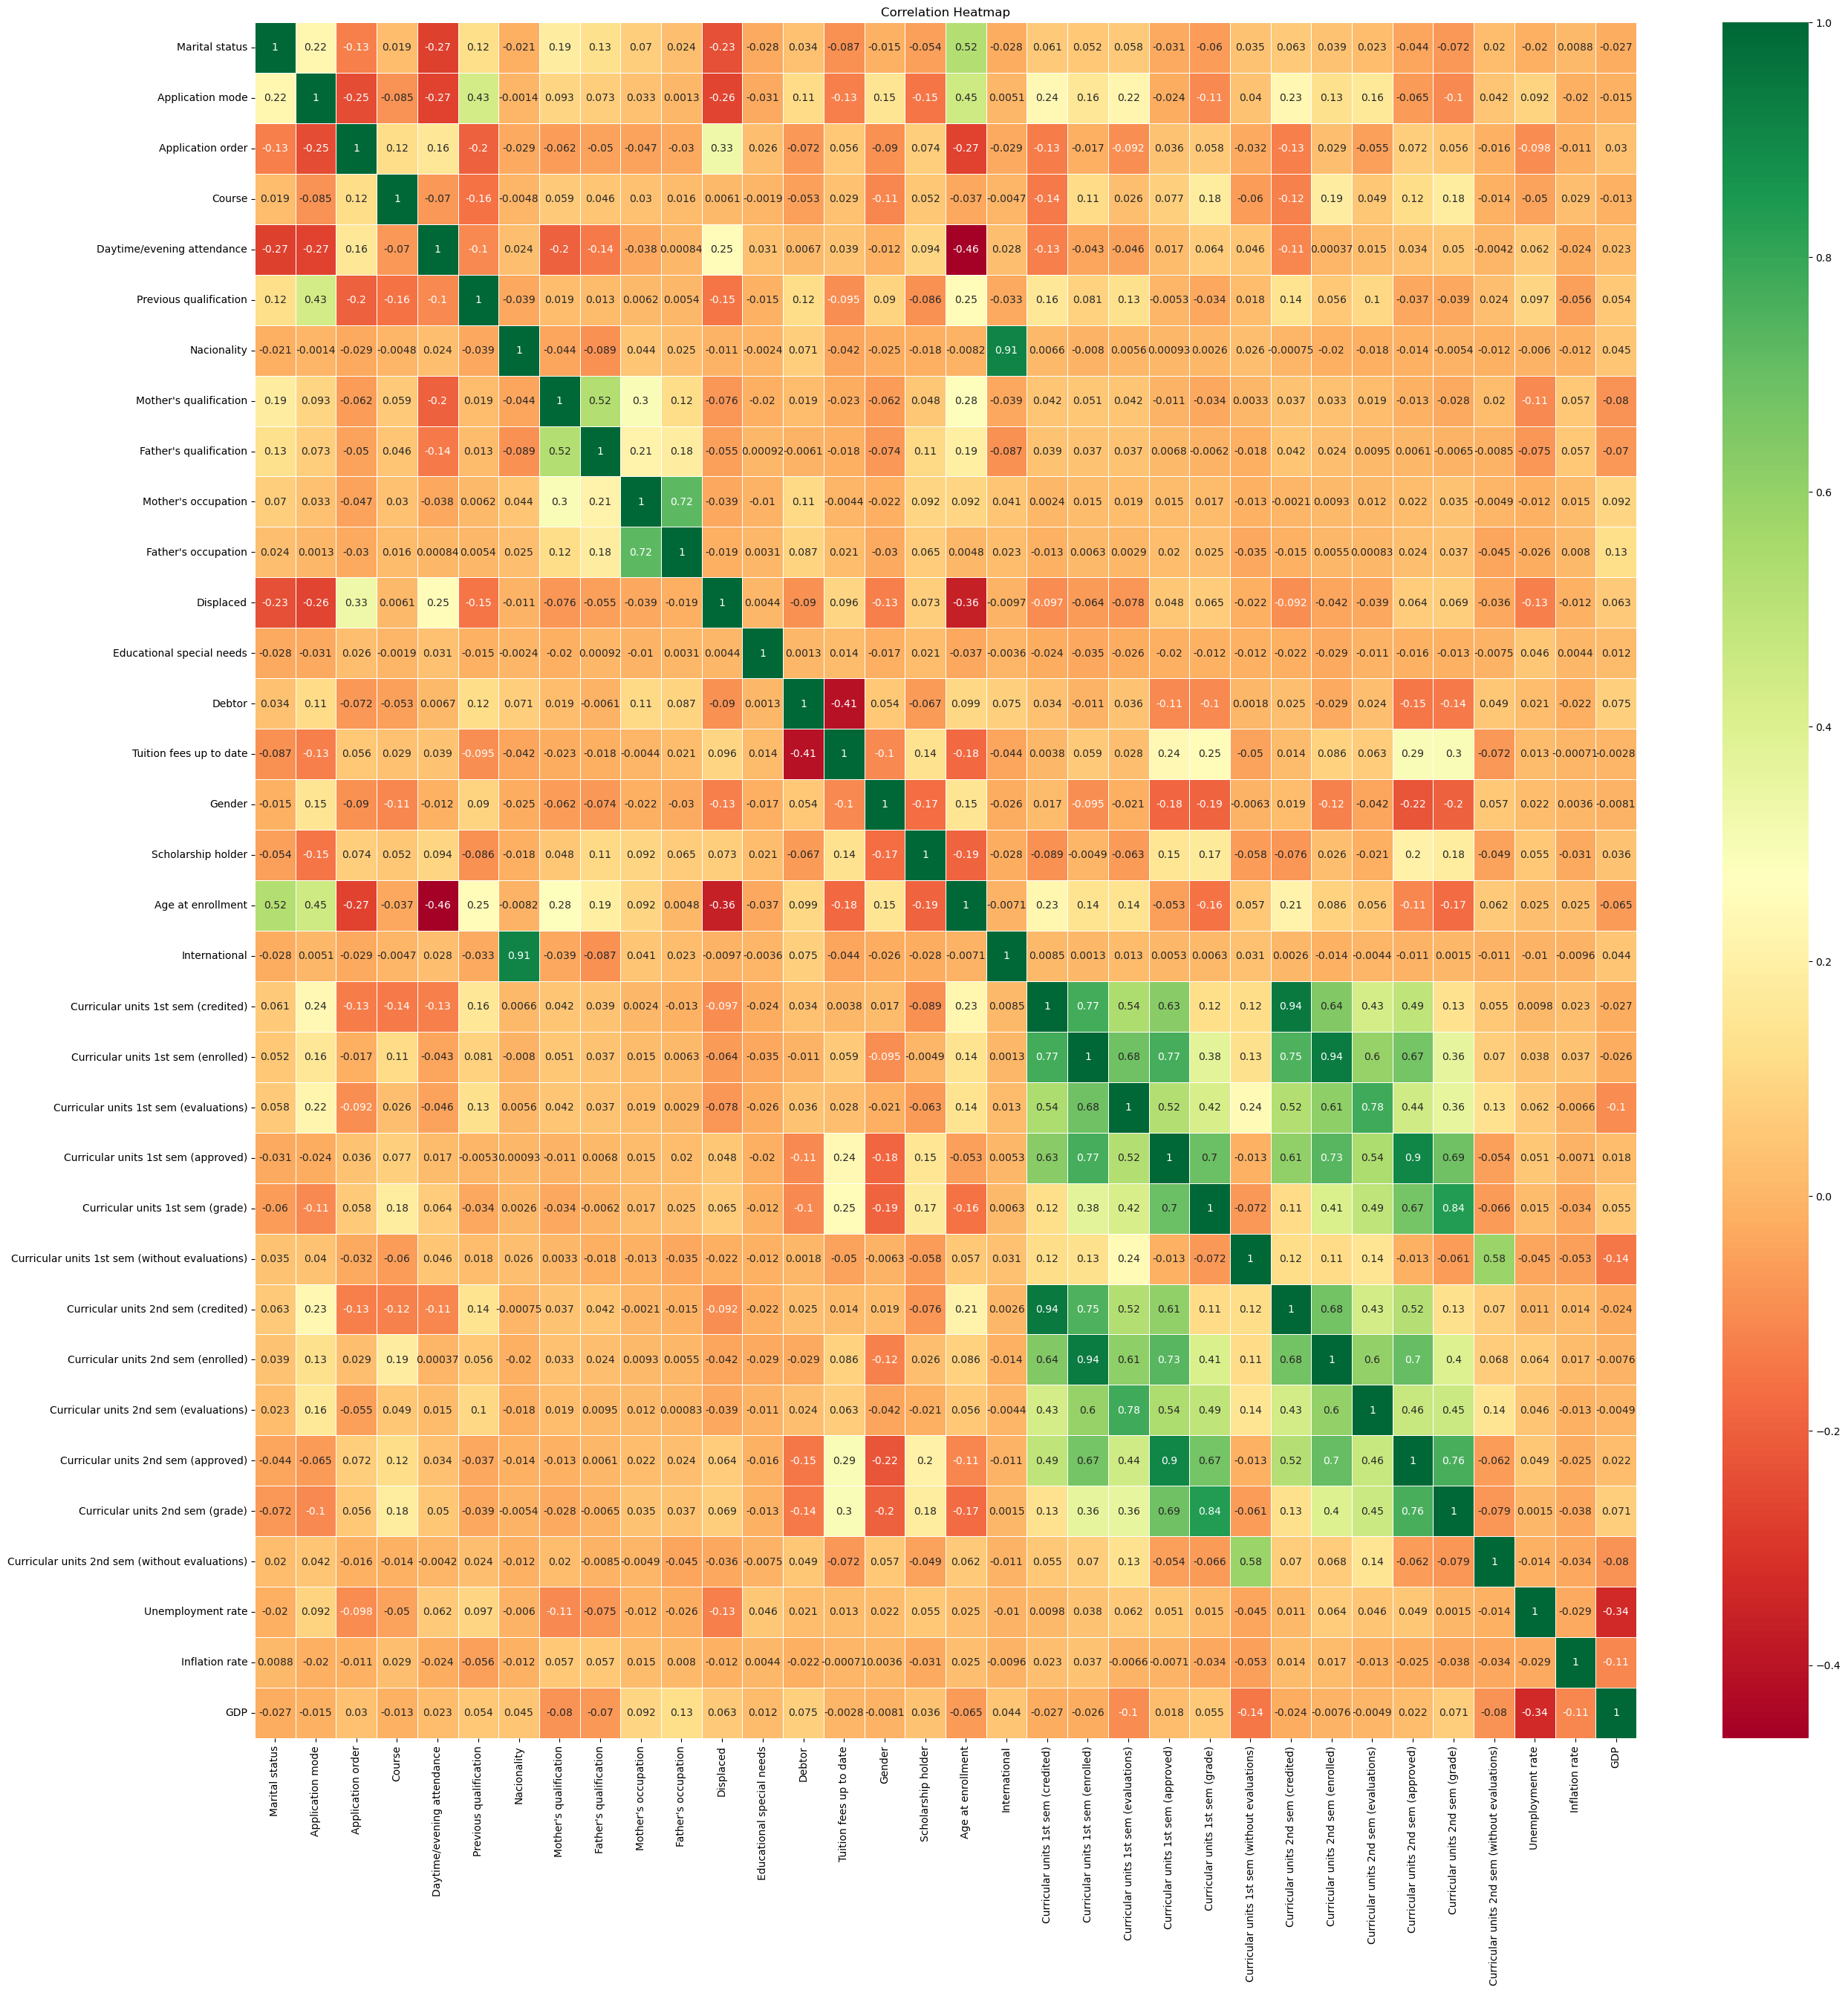

In [13]:
corr = df.select_dtypes(include="number").corr()

plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True, cmap="RdYlGn", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

<span style="color:#42cef5;">
A threshold of 0.1 was chosen to balance dimensionality reduction and information retention, removing features with minimal linear correlation while avoiding overly aggressive feature elimination.
<br><br/>
Based on this threshold, the following features exhibit very low correlation with the target outcome and may contribute limited predictive value:

Nationality, Mother’s qualification, and Father’s qualification, which show correlations close to zero, suggesting minimal association with student outcomes.

Educational special needs and International status, both of which display negligible correlations with the target variable.

Curricular units 1st semester (without evaluations), which has a relatively weak correlation compared to other academic performance features.

Unemployment rate and inflation rate, which also demonstrate minimal correlation at the individual student level.

While these variables show weak linear relationships with the target variable, feature removal should not rely solely on correlation analysis. 

Some features may still hold contextual or non-linear importance, particularly for certain model types. Therefore, it is recommended to evaluate model performance with and without these features before making final feature selection decisions.
</span>

# 3. Data Preparation

## 3.1 Data Cleaning

In [ ]:
## Clean data

## 3.2 Train-Test Split

In [ ]:
## Split data into train set and test set


# 4. Modelling

### 4.2 Train Model

In [ ]:
## Initialise and train model


# 5. Model Evaluation

In [ ]:
## Evaluate model


In [ ]:
## New data

## Predict


## Iterative model development


In [ ]:
## Further feature engineering / feature selection